In [1]:
import pandas as pd
dataset = pd.read_csv("data/day.csv",usecols=['season','holiday','weekday','workingday','weathersit','cnt'])
dataset.sample(frac=1).head()


,season,holiday,weekday,workingday,weathersit,cnt
617,3,0,0,0,1,8227
375,1,0,3,1,2,2177
513,2,1,1,0,1,6043
184,3,1,1,0,2,6043
115,2,0,2,1,1,4400


In [3]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")
dataset = pd.read_csv("data/day.csv",usecols=['season','holiday','weekday','workingday','weathersit','cnt']).sample(frac=1)
mean_data = np.mean(dataset.iloc[:,-1])

def var(data,split_attribute_name,target_name="cnt"):
  feature_values = np.unique(data[split_attribute_name])
  feature_variance = 0
  for value in feature_values:
    subset = data.query('{0}=={1}'.format(split_attribute_name,value)).reset_index()
    value_var = (len(subset)/len(data))*np.var(subset[target_name],ddof=1)
    feature_variance+=value_var
  return feature_variance

def Classification(data,originaldata,features,min_instances,target_attribute_name,parent_node_class = None):
  if len(data) <= int(min_instances):
    return np.mean(data[target_attribute_name])
  elif len(data)==0:
    return np.mean(originaldata[target_attribute_name])
  elif len(features) ==0:
    return parent_node_class
  else:
    parent_node_class = np.mean(data[target_attribute_name])
    item_values = [var(data,feature) for feature in features]
    best_feature_index = np.argmin(item_values)
    best_feature = features[best_feature_index]
    tree = {best_feature:{}}
    features = [i for i in features if i != best_feature]
    for value in np.unique(data[best_feature]):
      value = value
      sub_data = data.where(data[best_feature] == value).dropna()
      subtree = Classification(sub_data,originaldata,features,min_instances,'cnt',parent_node_class = parent_node_class)
      tree[best_feature][value] = subtree

  return tree

def predict(query,tree,default = mean_data):
  for key in list(query.keys()):
    if key in list(tree.keys()):
      try:
        result = tree[key][query[key]]
      except:
        return default
      result = tree[key][query[key]]
      if isinstance(result,dict):
        return predict(query,result)
      else:
        return result

def train_test_split(dataset):
  training_data = dataset.iloc[:int(0.7*len(dataset))].reset_index(drop=True)
  testing_data = dataset.iloc[int(0.7*len(dataset)):].reset_index(drop=True)
  return training_data,testing_data
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1]

def test(data,tree):
  queries = data.iloc[:,:-1].to_dict(orient = "records")
  predicted = []
  for i in range(len(data)):
    predicted.append(predict(queries[i],tree,mean_data))
  RMSE = np.sqrt(np.sum(((data.iloc[:,-1]-predicted)**2)/len(data)))
  return RMSE

tree = Classification(training_data,training_data,training_data.columns[:-1],5,'cnt')
pprint(tree)
print('#'*50)
print('Root mean square error (RMSE): ',test(testing_data,tree))


{'season': {1: {'weathersit': {1.0: {'weekday': {0.0: {'holiday': {0.0: {'workingday': {0.0: 1927.2142857142858}}}},
                                                 1.0: {'holiday': {0.0: {'workingday': {1.0: 2404.0}},
                                                                   1.0: 2173.75}},
                                                 2.0: {'holiday': {0.0: {'workingday': {1.0: 3864.2727272727275}}}},
                                                 3.0: {'holiday': {0.0: {'workingday': {1.0: 3299.4444444444443}}}},
                                                 4.0: {'holiday': {0.0: {'workingday': {1.0: 3320.3846153846152}}}},
                                                 5.0: {'holiday': {0.0: {'workingday': {1.0: 3119.0}}}},
                                                 6.0: {'holiday': {0.0: {'workingday': {0.0: 2756.4444444444443}}}}}},
                               2.0: {'holiday': {0.0: {'workingday': {0.0: {'weekday': {0.0: 3082.25,
                    

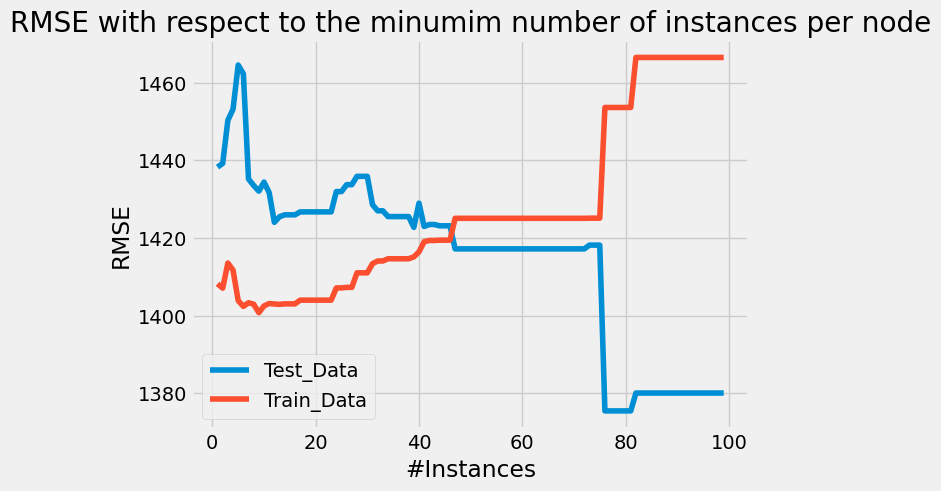

In [5]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
RMSE_test = []
RMSE_train = []
for i in range(1,100):
  tree = Classification(training_data,training_data,training_data.columns[:-1],i,'cnt')
  RMSE_test.append(test(testing_data,tree))
  RMSE_train.append(test(training_data,tree))

ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()





In [6]:
tree = Classification(training_data,training_data,training_data.columns[:-1],50,'cnt')
pprint(tree)


{'season': {1: {'weathersit': {1.0: {'weekday': {0.0: 1927.2142857142858,
                                                 1.0: 2333.153846153846,
                                                 2.0: 3864.2727272727275,
                                                 3.0: 3299.4444444444443,
                                                 4.0: 3320.3846153846152,
                                                 5.0: 3119.0,
                                                 6.0: 2756.4444444444443}},
                               2.0: 2460.125,
                               3.0: 934.75}},
            2: {'holiday': {0.0: {'weathersit': {1.0: {'weekday': {0.0: 5412.916666666667,
                                                                   1.0: 4615.375,
                                                                   2.0: 5026.2,
                                                                   3.0: 5483.5,
                                                                   4